## Image processing

In [3]:
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Test images

In [6]:
from skimage import data

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


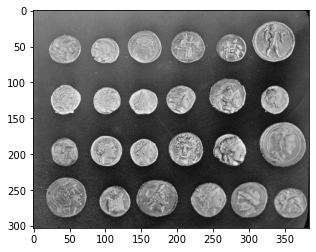

In [17]:
coins = data.coins()

print((f'Type: {type(coins)}\n'
       f'dtype: {coins.dtype}\n'
       f'shape: {coins.shape}'))
plt.imshow(coins, cmap='gray');

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (300, 451, 3)


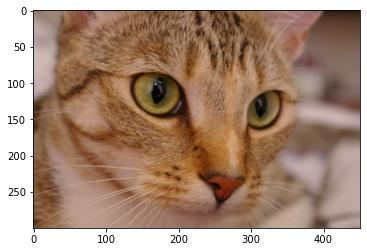

In [16]:
cat = data.chelsea()

print((f'Type: {type(cat)}\n'
       f'dtype: {cat.dtype}\n'
       f'shape: {cat.shape}'))
plt.imshow(cat);

## Basic color manipulation

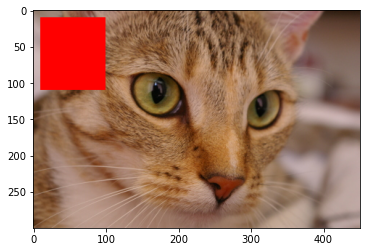

In [18]:
cat_copy = cat.copy()

cat_copy[10:110,10:100,:] = [255,0,0] #RGB
plt.imshow(cat_copy);

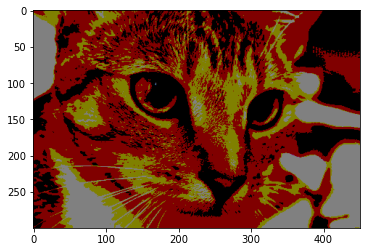

In [29]:
# color-based segmentation
n= 128

cat_seg = (cat//n)*n

plt.imshow(cat_seg);

## Image augumentation

## Image segmentation

threshold-based segmentation, edge-based segmentation, 


rotation/erosion/dilation/resize/
segmentation- threshold
sobel filter
fft- scipy.ndimage